# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [3]:



import pandas as pd

df = pd.read_csv("advertising.csv")
print(df)

        TV  Radio  Jornal  Vendas
0    230.1   37.8    69.2    22.1
1     44.5   39.3    45.1    10.4
2     17.2   45.9    69.3    12.0
3    151.5   41.3    58.5    16.5
4    180.8   10.8    58.4    17.9
..     ...    ...     ...     ...
195   38.2    3.7    13.8     7.6
196   94.2    4.9     8.1    14.0
197  177.0    9.3     6.4    14.8
198  283.6   42.0    66.2    25.5
199  232.1    8.6     8.7    18.4

[200 rows x 4 columns]


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

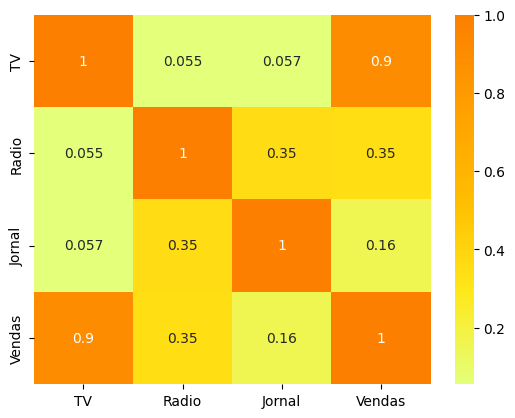

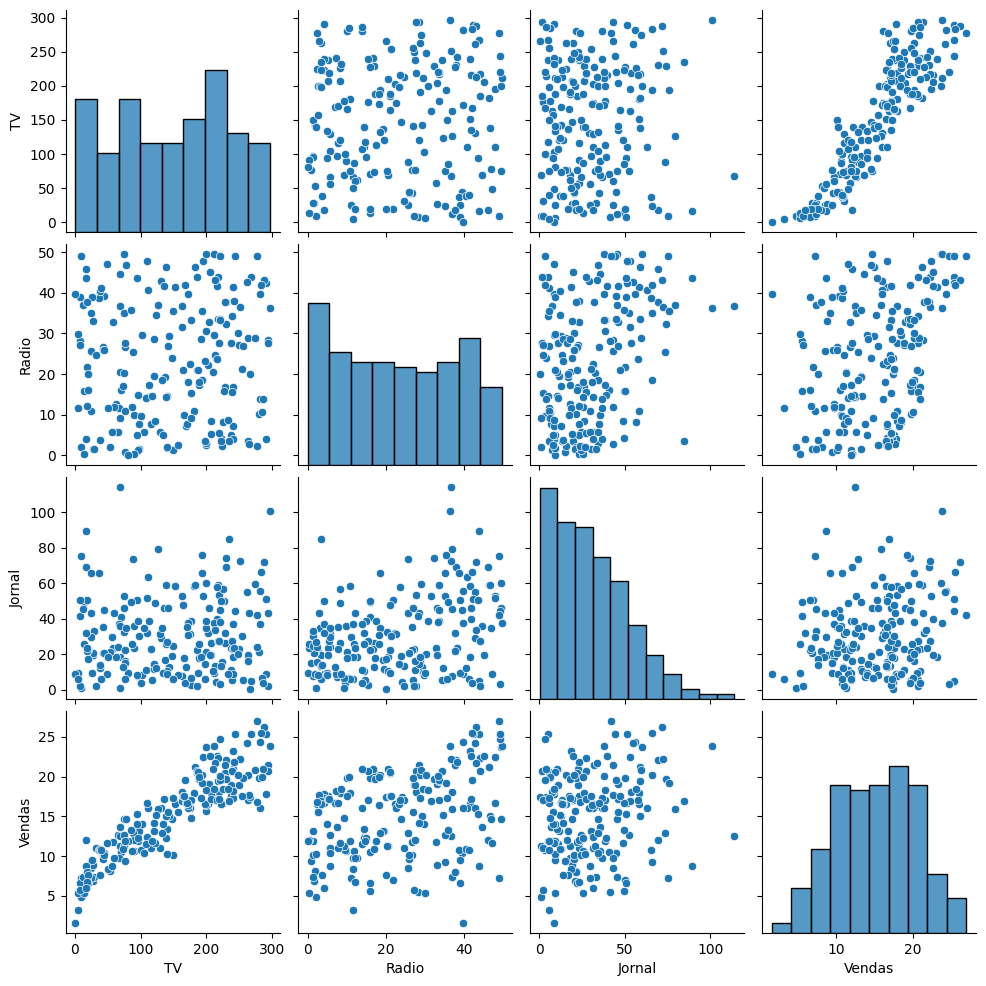

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot =True, cmap="Wistia")
plt.show()
sns.pairplot(df)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [5]:
from sklearn.model_selection import train_test_split
#no DROP tira algo dO DB, nesse exemplo é a coluna Vendas, passando axis=1 QUE É UMA COLUNA. Se fosse uma linha seria axis=0
x = df.drop('Vendas', axis=1) #CARACTERISTICAS PARA FAZER ÁS PREVISÕES DE VENDA
y = df['Vendas'] #DB na COLUNA DE VENDAS
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)#divisão de X e Y em teste e treinamento

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# TREINAMENTO DA  IA
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [ ]:
# teste AI
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
print(f"MSE da Regressão Linear: {mse_lin}")
r2_rf= metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")
print(f"MSE do Random Forest: {mse_rf}")

R² da Regressão Linear: 0.9071151423684273
MSE da Regressão Linear: 2.370659971225657
R² do Random Forest: 0.9631470639708388
MSE do Random Forest: 0.9405815166666682


#### Visualização Gráfica das Previsões

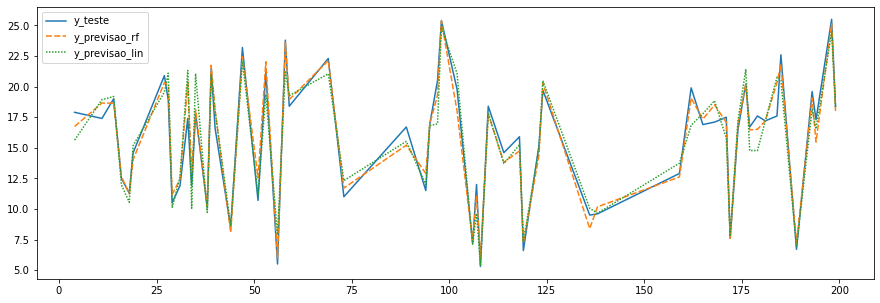

,y_teste,y_previsao_rf,y_previsao_lin
58,23.8,23.593,21.288161
40,16.6,18.069,18.042132
34,11.9,12.990,10.059590
102,19.8,18.028,21.082241
184,17.6,20.336,20.764760
198,25.5,25.119,24.471874
95,16.9,16.932,16.806436
4,17.9,16.741,15.628857
29,10.5,11.194,10.124799
168,17.1,18.501,18.846019


In [ ]:
df_resultado = pd.DataFrame()
# df_resultado.index = x_test
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
# display(df_resultado)
# df_resultado = df_resultado.reset_index(drop=True)
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

#### Qual a importância de cada variável para as vendas?

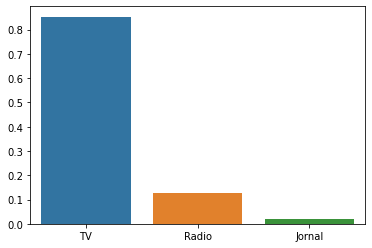

In [17]:
# importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
# plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()

#### Será que estamos investindo certo?

In [6]:
print(df[["Radio", "Jornal"]].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64
